In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns  # This optional package makes plots prettier

import openmc

## Inspecting HDF5 Pointwise Data

OpenMC does not use ACE cross sections.  It uses a purpose-built HDF5 data format.  The PythonAPI has full support for reading and modifying this format.  A Python object can be generated from an HDF5 file like this:

In [2]:
library = openmc.data.DataLibrary.from_xml(os.environ['OPENMC_CROSS_SECTIONS'])
filename = library.get_by_material('U238')['path']
u238_pointwise = openmc.data.IncidentNeutron.from_hdf5(filename)

Cross sections are accessed through the reaction "MT" number

In [3]:
for r in u238_pointwise.reactions.values(): print(r)

<Reaction: MT=2 (n,elastic)>
<Reaction: MT=16 (n,2n)>
<Reaction: MT=17 (n,3n)>
<Reaction: MT=18 (n,fission)>
<Reaction: MT=37 (n,4n)>
<Reaction: MT=51 (n,n1)>
<Reaction: MT=52 (n,n2)>
<Reaction: MT=53 (n,n3)>
<Reaction: MT=54 (n,n4)>
<Reaction: MT=55 (n,n5)>
<Reaction: MT=56 (n,n6)>
<Reaction: MT=57 (n,n7)>
<Reaction: MT=58 (n,n8)>
<Reaction: MT=59 (n,n9)>
<Reaction: MT=60 (n,n10)>
<Reaction: MT=61 (n,n11)>
<Reaction: MT=62 (n,n12)>
<Reaction: MT=63 (n,n13)>
<Reaction: MT=64 (n,n14)>
<Reaction: MT=65 (n,n15)>
<Reaction: MT=66 (n,n16)>
<Reaction: MT=67 (n,n17)>
<Reaction: MT=68 (n,n18)>
<Reaction: MT=69 (n,n19)>
<Reaction: MT=70 (n,n20)>
<Reaction: MT=71 (n,n21)>
<Reaction: MT=72 (n,n22)>
<Reaction: MT=73 (n,n23)>
<Reaction: MT=74 (n,n24)>
<Reaction: MT=75 (n,n25)>
<Reaction: MT=76 (n,n26)>
<Reaction: MT=77 (n,n27)>
<Reaction: MT=78 (n,n28)>
<Reaction: MT=79 (n,n29)>
<Reaction: MT=80 (n,n30)>
<Reaction: MT=81 (n,n31)>
<Reaction: MT=82 (n,n32)>
<Reaction: MT=83 (n,n33)>
<Reaction: MT=84 

In [4]:
n_gamma = u238_pointwise[102]
n_gamma.xs

{'294K': <openmc.data.function.Tabulated1D at 0x7f63573566d8>}

One HDF5 file can contain cross sections at many temperatures.  OpenMC can use this to interpolate between temperatures.  In this case, there is only one temperature.  This example shows how to plot every point in the dataset.

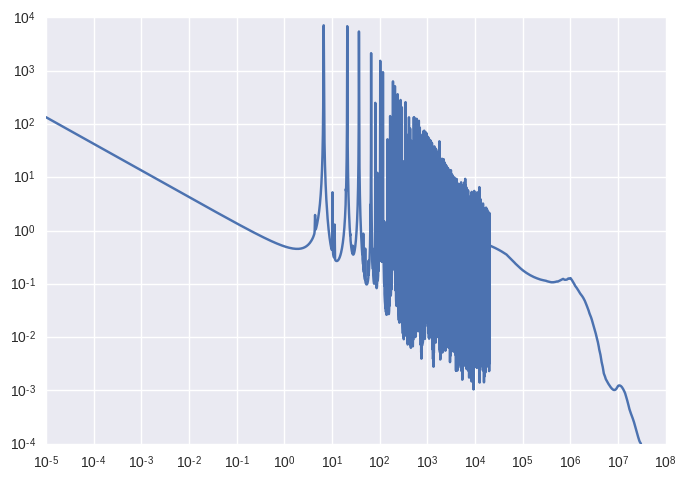

In [5]:
xs = n_gamma.xs['294K']
plt.loglog(xs.x, xs.y)

This example shows how to evaluate a cross section at arbitrary energy (with linear interpolation).

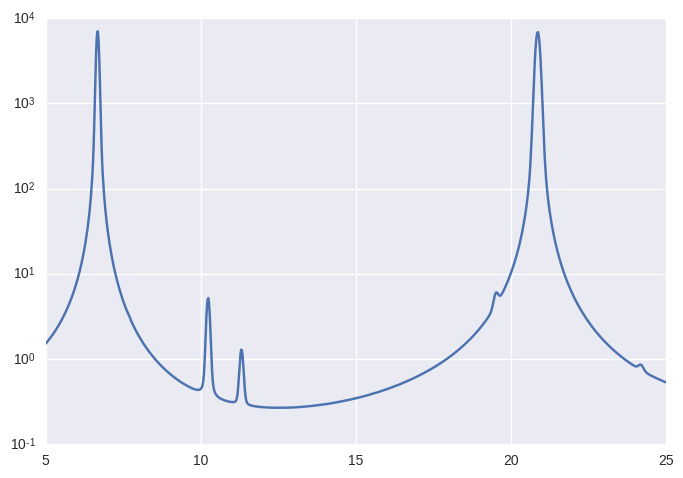

In [6]:
E = np.linspace(5, 25, 1000)
plt.semilogy(E, xs(E))

The PythonAPI can read ACE data with the method `openmc.data.IncidentNeutron.from_ace(...)`.  It can then output an HDF5 file with the `.export_to_hdf5(...)` method.  The PythonAPI even allows you to modify the data before export.

## Windowed Multipole Data

OpenMC can also be used with an experimental format called windowed multipole.

In [7]:
filename = os.environ['OPENMC_MULTIPOLE_LIBRARY'] + '/092238.h5'
u238_multipole = openmc.data.WindowedMultipole.from_hdf5(filename)

Windowed multipole allows for analytic Doppler broadening.  The Python object can generate cross sections for any reasonable temperature and any energy in the resolved resonance range.  Calling a `WindowedMultipole` object gives 3 cross sections: total, (n, gamma), and fission

In [8]:
u238_multipole(1.0, 294)

(array(9.638243132516015),
 array(0.5053244245010787),
 array(2.931753364280356e-06))

Here is how to make the same plot of (n, gamma) cross section as before.

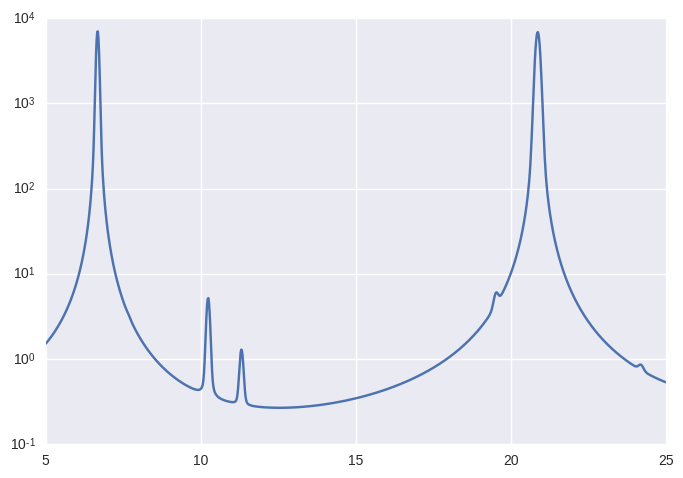

In [9]:
E = np.linspace(5, 25, 1000)
plt.semilogy(E, u238_multipole(E, 293.606)[1])

This plot shows the Doppler broadening between 0 K and 900 K.

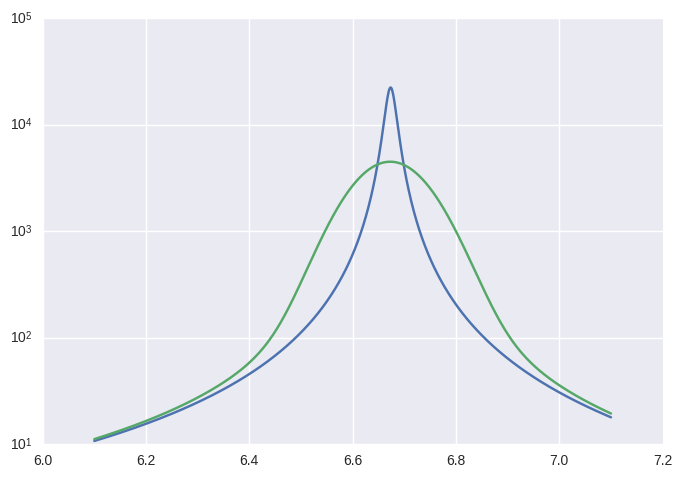

In [10]:
E = np.linspace(6.1, 7.1, 1000)
plt.semilogy(E, u238_multipole(E, 0)[1])
plt.semilogy(E, u238_multipole(E, 900)[1])